<a href="https://colab.research.google.com/github/naveenkumar2306/Infrence/blob/main/Infrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading and Loading images

In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
img = cv2.imread("/content/sample1.jpg")

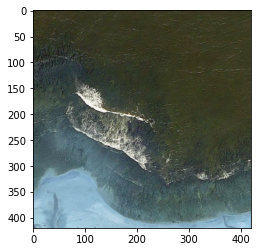

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(420, 420, 3)

In [ ]:
(r, g, b) = cv2.split(img)

In [ ]:
r.shape

(420, 420)

In [ ]:
b.shape

(420, 420)

In [ ]:
b

array([[ 42,  42,  32, ...,  34,  27,  39],
       [ 34,  34,  46, ...,  37,  40,  47],
       [ 33,  26,  32, ...,  31,  40,  30],
       ...,
       [196, 215, 204, ..., 218, 216, 214],
       [201, 195, 184, ..., 213, 215, 218],
       [192, 157, 149, ..., 217, 219, 216]], dtype=uint8)

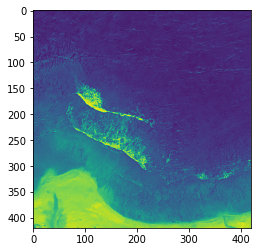

In [ ]:
plt.imshow(b)

# Upload and Unzip

In [ ]:
# Upload Satellite Image Colorizer.zip to colab storage from left pane

!unzip -q Satellite\ Image\ Colorizer.zip

replace model/colorizer/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace model/colorizer/variables/variables.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace model/colorizer/variables/variables.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


# Import required libraries

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import utils

# Defining Constants

In [ ]:
# size of image on which model was trained
# me need to resize all the images to this size


IMAGE_DIMENSION =(128, 128) 

# Loading trained autoencoder model

In [ ]:
# load trained autoencoder

autoencoder = load_model('model/colorizer')

In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
encoder (Functional)         (None, 65536)             369664    
_________________________________________________________________
decoder (Functional)         (None, 128, 128, 2)       960066    
Total params: 1,329,730
Trainable params: 1,329,730
Non-trainable params: 0
_________________________________________________________________


# Testing on images

In [ ]:
test_image_dir = 'test_images'
testing_files = os.listdir(test_image_dir)
print('FOUND {} IMAGES'.format(len(testing_files)))

FOUND 10 IMAGES


In [ ]:
CHOSEN_IMAGE_INDEX = 4
print('Testing on ', testing_files[CHOSEN_IMAGE_INDEX])
image_file_name = testing_files[CHOSEN_IMAGE_INDEX]

Testing on  sample10.jpg


## Reading image

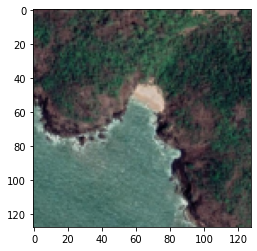

In [ ]:
# reading image
image = imread('test_images/'+image_file_name)
# some images have 4 channels for transparency (like png images), discarding 4th channel
image = image[:,:,:3]
# resizing image to required dimension
image = resize(image, IMAGE_DIMENSION)

# plotting image
plt.imshow(image)

## RGB to LAB

This step is required if you are testing on color image

As we have color image, so we will be first converting to LAB \
L - Lightness (Black and White) \
A, B -  Color

We will pass L to autoencoder which will predict A', and B'. To get full RGB image we will convert LA'B' to RGB

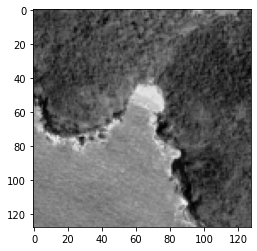

In [ ]:
# converting to lab color 
l, ab = utils.RGB2L_AB(image, IMAGE_DIMENSION)

# plotting l channel (black and white)
plt.imshow(l.reshape(IMAGE_DIMENSION), cmap='gray')

## Predicting color from grayscale image (L)

In [ ]:
# predicting color of black and white image

predicted_ab = autoencoder.predict(np.expand_dims(l, axis=0))

## Converting LA'B' to RGB

In [ ]:
# converting LA'B' to RGB

colorized_image = utils.L_AB2RGB(l, predicted_ab[0], IMAGE_DIMENSION)
print("FInal color image shape ",colorized_image.shape)

FInal color image shape  (128, 128, 3)


## Result Comparision

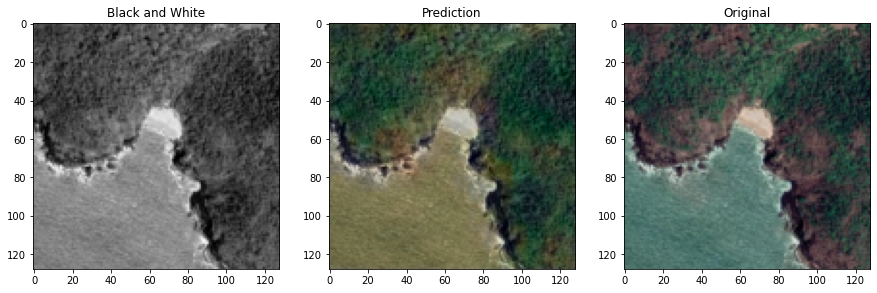

In [ ]:
# plotting all images

plt.figure(figsize=(15,18))
plt.subplot(1,3,1)
plt.imshow(l.reshape(IMAGE_DIMENSION), cmap='gray')
plt.title('Black and White')

plt.subplot(1,3,2)
plt.imshow(colorized_image)
plt.title('Prediction')

plt.subplot(1,3,3)
plt.imshow(image)
plt.title('Original')

plt.show()